# Simple and Multiple Linear Regression with Python

The aim of this fist course is to make an introduction of the linear regression model from a **Statistical** point of view. 
We are going to see, in the next courses, how we are going to study this model from a **Machine Learning** point of view, *i.e.*, given a different context.

In the previous class, we have seen we can study the link between two random variables where at least one was a *qualtative* one. 
We have built some test in order to determine if the link between these two variables was significant or not. 

We are going a little bit further now and study the link between two (or more) quantitatives random variables. More precisely, we are going to study the relation between a random variable *Y*, which will be called the **dependent** random variable and $X_1, X_2, \ldots, X_p$ a set of **independent** random variables.
We aim to study if ce are able to predict the values taken by the random variable $Y$ using the set of variables $X_1, X_2, \ldots, X_p$.

For instance, this is done to predict the sales revenue in a given store ($Y$) using several information, the temperature of the day ($X_1$), the number of customers ($X_2$) you are going to have in the store (this number can be predicted by another type of model) if you are in the weekend or not ($X_3$), etc. 




## 1. Presentation of the model

In order to do the prediction, we are going to assume that we have linear relationship between $Y$ and $X_1, X_2, \ldots, X_p$, *i.e.*, 

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \varepsilon$$,

where 

- $Y$ is the dependent variable,
- $X_j, \; j=1, \ldots, p $ are the dependent variable,
- $\beta_j, \; j=1,\ldots, p$ are the parameters of the model,
- $\varepsilon$ are random noise which represent the noise in the data/model (it means that the model we are learning is not a perfect one).

Most of the time, we assume that we are working in the *Gaussian* setting, thus, we are formulating assumptions on the erros of the model:

- the data $S= \lbrace (y_i,\bf{x}_i)\rbrace_{i=1}^m$ are independent,
- the noise follow a normal distribution and are independent, *i.e.*, $\varepsilon \underset{i.i.d.}{\sim} \mathcal{N}(0,\sigma^2)$, where the variance of the model is the same for every observations.

The above problem is usually written as follows, using matrices

$$ Y = X\beta + \varepsilon$$,

where

- $X \in \mathbb{R}^{m\times (p+1)}$ is the *design* matrix,
- $y$ is the vector of observations $y_1, \ldots, y_p$,
- $\beta = (\beta_1, \ldots, \beta_p) \in \mathbb{R}^{p+1} $ is the parameter vector.
- $\varepsilon = (\varepsilon_1, \ldots, \varepsilon_p)\in \mathbb{R}^{m} $ is the vector of random errors in the data.

### Example 1

We consider a little dataset where we aim to predict the values taken by a randim variable $Y$ given another variable $X$.
We are going to work with the following dataset.

In [1]:
# First, we import the required package to perform a linear regression

import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# We download the dataset we are going to work.

df = sm.datasets.get_rdataset('Duncan', 'carData').data
y = df['income']
x = df['education']

# To show the first lines of the dataset.

df.head()

type  income  education  prestige
rownames                                     
accountant  prof      62         86        82
pilot       prof      72         76        83
architect   prof      75         92        90
author      prof      55         90        76
chemist     prof      64         86        90

In this example, we want to predict the **income** given the **education** of the observation.
Later, we are going to consider the other variable prestige, in order to work with a multiple linear regression.

Text(0, 0.5, 'Income')

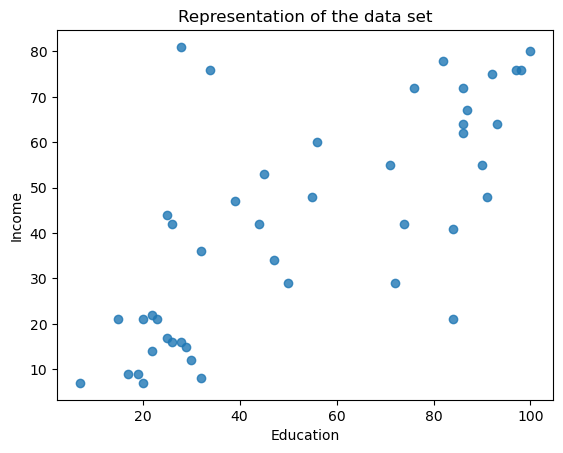

In [3]:
# Representation of the data

plt.scatter(x,y, alpha = 0.8)
plt.title("Representation of the data set")
plt.xlabel("Education")
plt.ylabel("Income")


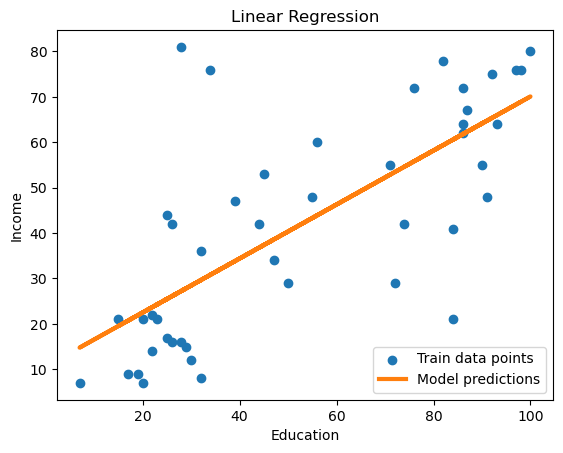

In [4]:
# Learn the model

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

# Extract the model parameters
b, m = results.params

# Represent the learning model
plt.scatter(x, y, label="Train data points")
plt.plot(
    x,
    results.predict(),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
plt.title("Linear Regression")
plt.xlabel("Education")
plt.ylabel("Income")
plt.legend()

It seems that we have a linear relationship between these two variables. The following line of code provides several outputs on the learned model that we are going to explain in this course.

In [5]:
# Summary of the model

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     47.51
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           1.84e-08
Time:                        08:55:43   Log-Likelihood:                -190.42
No. Observations:                  45   AIC:                             384.8
Df Residuals:                      43   BIC:                             388.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6035      5.198      2.040      0.048       0.120      21.087
education      0.5949      0.086      6.893      0.000       0.421       0.769
==============================================================================
Omnibus:                        9.841   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.609
Skew:                           0.776   Prob(JB):                      0.00497
Kurtosis:                       4.802   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. Parameter estimation

We have previously seen that the a line was learned to describe the relation between the two variables. But ... how is it learned? 

Keep in mind that the main idea is to find a *line* which is good approximation of the dataset, *i.e.* which is not far from the set of points. But, what does that mean not being far from a set of point, which distance are we going to use for this and how the parameters $\beta_j$ estimated. 

All of this is given in the proposition below

**Proposition:** We consider the following probabilistic model for our data.

$$Y =  X\beta + \varepsilon,$$

where $Y$ it the predicted variable and $X$ is the set of variables that are used for the prediction and $\varepsilon$ represents the error of the model.\\
We consider a hypothesis $h$ of the form:

$$h(\beta,X) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_p x_p. $$

Given a set $S$ of $m$ examples, $X = (x_1,x_2,\ldots,x_m)$ and $y = (y_1,y_2,\ldots, y_m)$
then the solution of Ordinary Least Square problem:

$$\underset{\beta \in \mathbb{R}^{p+1}}{\min} \; \Vert y-h(\beta, X) \Vert_2^2 = \underset{\beta \in \mathbb{R}^{p+1}}{\min} \; \sum_{i=1}^m \left(y_i - h(\beta,x_i)\right)^2 = \underset{\beta \in \mathbb{R}^{p+1}}{\min} \; \sum_{i=1}^m \left(y_i - (\beta_0 + \beta_1 x_{i,1} + \beta_2 x_{i,2} + \ldots + \beta_p x_{i,p})\right)^2 ,$$

is given by: 

$$\hat{\beta} = (X^\top X)^{-1}X^\top y.$$

### Exercise 1: Expression of the solution for the simple linear model

Use your knowledge to give an expression of the slope and the intercept of the simple linear model using matrix calculations and the result presented above. 
More precisely, show that the slope $\beta_1$ and the intercept $\beta_0$ are respectively given by :

$$ \hat\beta_1 = \dfrac{Cov[X,Y]}{Var[X]} \quad \text{and} \quad \hat\beta_0 = \mathbb{E}[Y] - \hat\beta_1\mathbb{E}[X],$$

where $\mathbb{E}[•]$ stands for the expectation of the random variable, $i.e.$, its mean value, $Var[•]$ for its variance and $Cov[•,•]$ stands for the covriance of a couple of random variables.

## 3. Output of the linear model

In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     47.51
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           1.84e-08
Time:                        08:55:43   Log-Likelihood:                -190.42
No. Observations:                  45   AIC:                             384.8
Df Residuals:                      43   BIC:                             388.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6035      5.198      2.040      0.048       0.120      21.087
education      0.5949      0.086      6.893      0.000       0.421       0.769
==============================================================================
Omnibus:                        9.841   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.609
Skew:                           0.776   Prob(JB):                      0.00497
Kurtosis:                       4.802   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We are going to explain all of these outputs: what they mean, how they can be used and ... how they can be computed. 

### Exercise 2: Linear model output

Use what has been presented in class in order to compute the outputs of the linear regression models. 
Focus only on the one that have been presented in class, you can focus on:

- parameters estimation: values, standard errors, t-values and p-values.
- quality of the model: F-statistic, R-squared and Adj. R-squared.

### Exercise 3: Multiple linear model

Now we aim to repeat the same exercise as in Exercise 2 but using the two variables *education* and *prestige* in order to predcit the *income*, *i.e.*, working with a multiple linear model. 

Compare this multiple linear model, with the simple linear model. Can you say that this model is better? Are the variables important for the prediction? Write your observations and conclusion. 

You can use the above code to conduct your analysis and the small script below in order to prepare your dataset. 

In [10]:
df = sm.datasets.get_rdataset('Duncan', 'carData').data
y = df['income']
x = df[['education','prestige']]

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     49.55
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           8.88e-12
Time:                        08:58:51   Log-Likelihood:                -179.90
No. Observations:                  45   AIC:                             365.8
Df Residuals:                      42   BIC:                             371.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4264      4.164      2.504      0.016       2.024      18.829
education      0.0323      0.132      0.244      0.808      -0.234       0.299
prestige       0.6237      0.125      5.003      0.000       0.372       0.875
==============================================================================
Omnibus:                        9.200   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               21.265
Skew:                           0.075   Prob(JB):                     2.41e-05
Kurtosis:                       6.364   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see, using this new dataset, that the variable is no more important, we observe a p-value which is close to 0.8. However, this time, the variable prestige is significant, we observe a p-value very close to 0.

When it comes to the quality of the model, we can see that, in terms of Adjusted $R^2$, the model with these two variables can look more significant than the model with the variable education only. 

Also, since the variable education has been shown to be non significant, it can also be interesting to study the quality of the model when we do not use it as an independent variable.

In [22]:
df = sm.datasets.get_rdataset('Duncan', 'carData').data
y = df['income']
x = df['prestige']

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     101.3
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           7.14e-13
Time:                        09:32:56   Log-Likelihood:                -179.93
No. Observations:                  45   AIC:                             363.9
Df Residuals:                      43   BIC:                             367.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8840      3.678      2.959      0.005       3.467      18.301
prestige       0.6497      0.065     10.062      0.000       0.519       0.780
==============================================================================
Omnibus:                        8.893   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               19.848
Skew:                           0.047   Prob(JB):                     4.90e-05
Kurtosis:                       6.252   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we expected, the variable "education" was not significant, meaning it had no impact on the quality of the model and could therefore be removed without affecting its performance.

## 4. Residual Analysis

The aim of this part is to study the residuals of our model in order to check if the assumptions linked to the linear gaussian model are fulfilled. 
We need to check if


- if the residuals are normally distributed
- if they are indepdendent 
- the homoscedasticity assumption (*i.e.*, equal variances)



In [20]:
# We first import another library that will be useful to draw an histogram and perform a statistical assumption

import seaborn as sns
from scipy.stats import shapiro
from yellowbrick.regressor import ResidualsPlot

### 4.1 Focus on the normality assumption

We first study if the residuals are normally distributed.

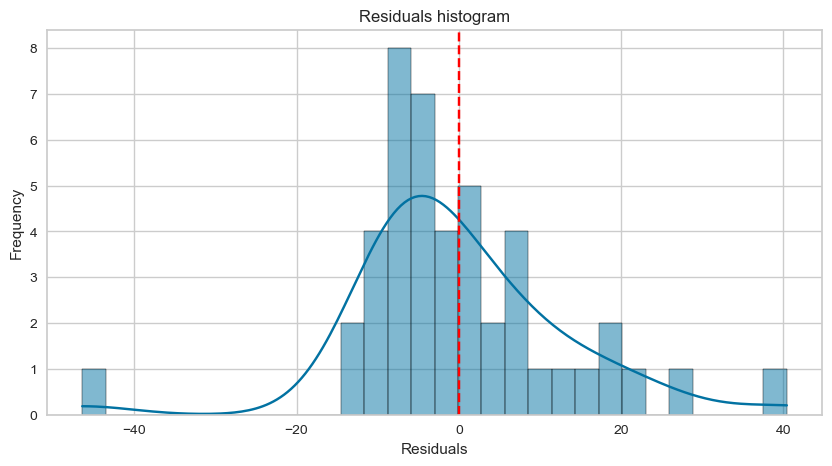

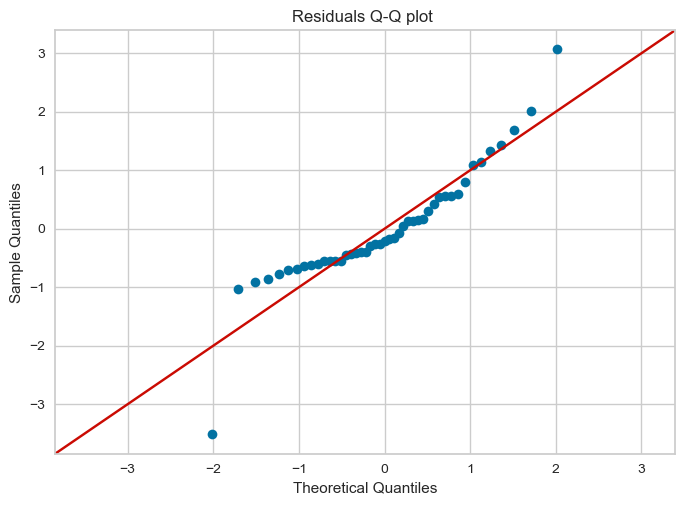

Test de Shapiro-Wilk : p-value = 0.000745003475006071
Residuals are not normally distributed (we reject H0).


In [27]:
# Compute the residuals
residuals = results.resid

# We can first draw a little histogram to check the normality assumption
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='dashed')
plt.title("Residuals histogram")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


# Q-Q plot (Quantile-Quantile plot)
sm.qqplot(residuals, line='45', fit = True)
plt.title("Residuals Q-Q plot ")
plt.show()

# Test de normalité des résidus (Shapiro-Wilk)
stat, p_value = shapiro(residuals)
print(f"Test de Shapiro-Wilk : p-value = {p_value}")
if p_value > 0.05:
    print("Residuals are normally distributed (we do not reject H0).")
else:
    print("Residuals are not normally distributed (we reject H0).")


If have a look at the residuals, even if the number of instances is quite low, we are far from being normally distributed.
Thus it means that there is a problem with the current model and that there is maybe to linear relationship between the studided X and Y in our dataset.
However, we have to be carefull in this situation since the number of points is very low. 

### 4.2 Homoscedasticity 

The residuals can be extracted from the results.outlier_test object. As presented in class, to conduct this study, we need to comptue the studentized residuals. But this is automatically done using the following line of code.

In [35]:
# Compute studentized residuals

stud_res = results.outlier_test().student_resid

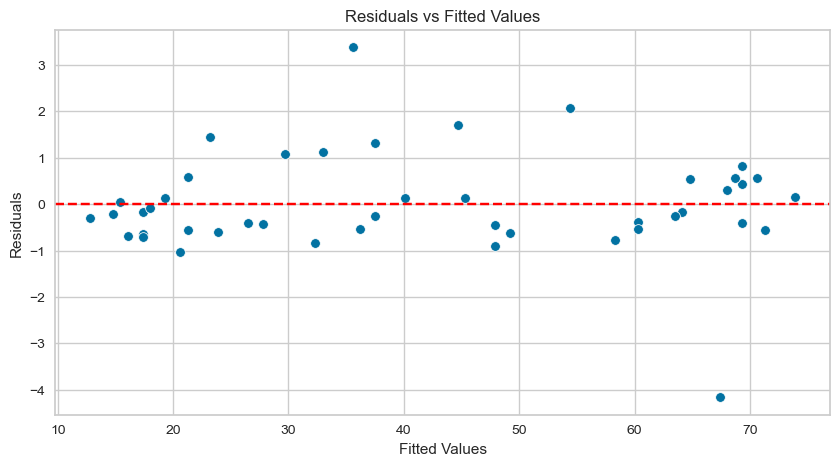

In [36]:
# Graph Residuals vs fitted values

fitted_values = results.fittedvalues
plt.figure(figsize=(10, 5))
sns.scatterplot(x=fitted_values, y=stud_res)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()



Since there is no particular pattern in the residuals, we can say that the homoscedasticity assumption is fulfilled. 

If everything is fine, approximately 95% of the residuals shall be in the range $[-2,2]$. The points that are usually outside this range can be considered as outliers aand removed from the dataset. But we do not focus on that point here.
Since there is no particular pattern in the residuals also, we can consider them as independent also.

### Exercise 4: 

This dataset contains information collected by the U.S Census Service concerning housing in the area of California Mass.
In this dataset, we aim to predict the value of the variable MedHouseVal using all the other features/variables.

In [207]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

df = fetch_california_housing()

y = df.target
x = df.data

df_new_y = pd.DataFrame(y,columns=[df.target_names])
df_new_x = pd.DataFrame(x,columns=[df.feature_names])
df_new = pd.concat([df_new_y,df_new_x], axis= 1)

Now we can run the linear regression of the model

In [194]:
import statsmodels.formula.api as smf

model = smf.ols(formula = 'MedHouseVal ~ MedInc + HouseAge + AveRooms + AveBedrms + Population + AveOccup +  Latitude + Longitude', 
                data = df_new)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:18:12   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Study the output of the linear model and try to see what happens if you remove the unsignificant feature. 

# 5. Building a model

In the above output, you have seen that there is potentially strong multicollinearity among the set features used in the previous regression model. We have seen that we can detect these strong colinearities using the VIF procedure. 

Computing the VIF can be easilly done as follows and using the appropriate tool from the statsmodel library.

In [195]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
features = df.feature_names
vif_data["feature"] = features

X = df.data

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X, i)
                          for i in range(len(features))]

print(vif_data)

      feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


We can see that that several features have a VIF higher than $5$, and thus need to be removed from the dataset. However, as we have seen in class, we cannot remove them in a single round. We have to do it one by one, removing, at each round, the variable that has the highest VIF (in case there are VIF higher than $5$).

In the example above, we shall remove the variable *Longitude* from the dataset and go on. We need to detect and remove it automtically.

In [196]:
# In the previous object, we need to study which row contains the highest VIF.

print(vif_data.idxmax(axis="rows"))

# We extract the name of the associated feature and remove it from the dataset

col_to_remove = vif_data.iloc[vif_data.idxmax(axis="rows")['VIF']]['feature']
features.remove(col_to_remove)
print(features)

feature    4
VIF        7
dtype: int64
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude']


It remains to go on with the remaining columns until there is no more VIF higher than $5$.
You may create a loop for that or do it manually.


## Exercise 5

Conduct the same complete study to build the best regression model you can (using also the forward/backward procedure) on the dataset available online, the file is entitled *Attendance*.
The aim is to predict the values of the attendance variable. 